# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats
#sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


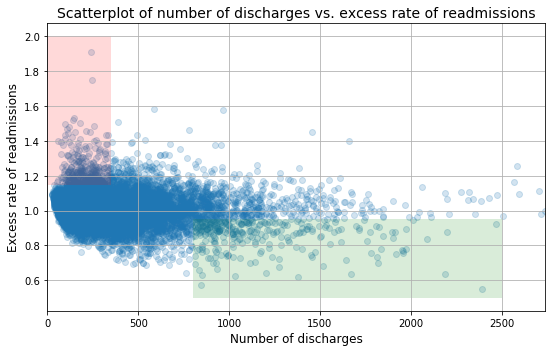

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
df =clean_hospital_read_df 
clean_data = df[['Number of Discharges','Excess Readmission Ratio']].dropna()


In [6]:
clean_data.columns = ['Discharges', 'Ratio']

In [7]:
#Categorizing Hospital by their number discharges 
#D. Regulatory policy recommendations
small_hospitals = clean_data[clean_data['Discharges']<100]
big_hospitals = clean_data[clean_data['Discharges']>1000]


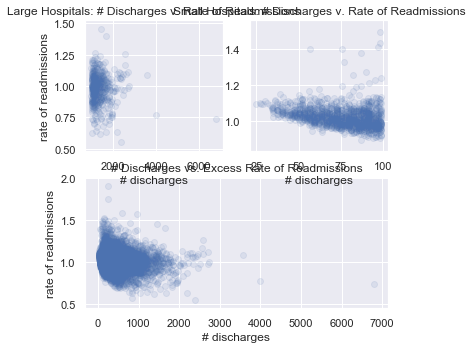

In [14]:
sns.set()
plt.figure(figsize=(18, 4))
plt.close('all')
plt.tight_layout()

plt.subplot(2,2,(3,4))
plt.scatter(x=clean_data.Discharges, y=clean_data.Ratio, alpha = .1)
plt.xlabel('# discharges')
plt.ylabel('rate of readmissions')
plt.title('# Discharges vs. Excess Rate of Readmissions')


plt.subplot(2,2,2)
plt.scatter(x=small_hospitals.Discharges, y=small_hospitals.Ratio, alpha = .1)
plt.xlabel('# discharges')
plt.ylabel('rate of readmissions')
plt.title('Small Hospitals: # Discharges v. Rate of Readmissions')

plt.subplots_adjust(left=.2, bottom=0, right=None, top=1, wspace=None, hspace=None)

plt.subplot(2,2,1)
plt.scatter(x=big_hospitals.Discharges, y=big_hospitals.Ratio, alpha = .1)
plt.xlabel('# discharges')
plt.ylabel('rate of readmissions')
plt.title('Large Hospitals: # Discharges v. Rate of Readmissions')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


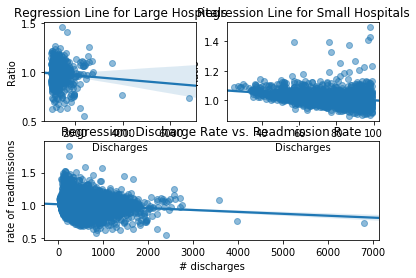

In [9]:
plt.figure(figsize=(18, 4))
plt.close('all')
plt.tight_layout()

plt.subplot(2,2,(3,4))
sns.regplot(x='Discharges', y='Ratio', data=clean_data, scatter_kws={'alpha':0.5})
plt.xlabel('# discharges')
plt.ylabel('rate of readmissions')
plt.title('Regression: Discharge Rate vs. Readmission Rate');

plt.subplot(2,2,2)
sns.regplot(x='Discharges', y='Ratio', data=small_hospitals, scatter_kws={'alpha':0.5})
plt.title('Regression Line for Small Hospitals');

plt.subplot(2,2,1)
sns.regplot(x='Discharges', y='Ratio', data=big_hospitals, scatter_kws={'alpha':0.5})
plt.title('Regression Line for Large Hospitals');
plt.show()

<div class="bg-warning"><br>
<p> <h3>Setup an appropriate hypothesis test.</h3> </p>
<br></div>

<p class="bg-primary">
    We follow standard hypothesis test procedures in conducting a hypothesis test for the population correlation coefficient. First, we specify the null and alternative hypotheses.
  <br>  <br>The null hypothesis is that there is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
$$H_0: r=0$$Return Pearson product-moment correlation coefficients.The relationship between the correlation coefficient matrix, R, and the covariance matrix, C, is $$R_{ij} = \frac{ C_{ij} } { \sqrt{ C_{ii} * C_{jj} } }$$
The values of R are between -1 and 1, inclusive.<br><br>Second, we calculate the value of the test statistic using the following formula:
    $$t^* = R*{ \frac{\sqrt{n -2  }} {\sqrt{1 -R^2  }} }$$
</p>
 

<div class="bg-warning"><br>
<p> <h3>Compute and report the observed significance value (or p-value)</h3> </p>
<br></div>

In [10]:
#numpy.corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>)[source]¶
R = np.corrcoef(clean_data.Discharges, clean_data.Ratio)[0][1]

t = R*np.sqrt(len(clean_data)-2)/(1-R**2)
p_value = stats.t.cdf(x=t, df = len(clean_data)-2)*2

print('t_stat', t )
print('p_value', p_value)


t_stat -10.542504966163985
p_value 7.219102940223698e-26


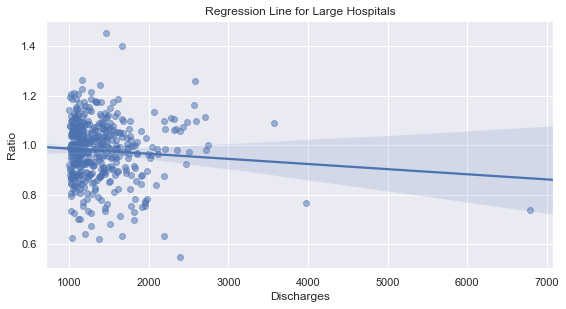

In [17]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
sns.regplot(x='Discharges', y='Ratio', data=big_hospitals, scatter_kws={'alpha':0.5})
plt.title('Regression Line for Large Hospitals');
plt.show()

<p class="bg-primary"><br><br>P value is extremely low, so the null hypothesis  that there is no correlation between hospital size and readmission rate must  be rejected. <br><br>
</p>
 

In [11]:
ttest= stats.pearsonr(clean_data.Discharges, clean_data.Ratio)
ttest
print('observed_p_value',ttest[1])

observed_p_value 1.222547377680967e-25


<p class="bg-primary"><br><br>Another way of checking p_value and it confirms that p_value is way low so that the null hypothesis that there is no correlation between hospital size and readmission rate must be rejected.  <br><br>
</p>
 

In [12]:
size=10000

bs_r = np.empty(size) 
bs_p = np.empty(size)

# generate pairs bootstrap samples
for i in range(size):
    bs_r[i], bs_p[i] = stats.pearsonr(clean_data.Discharges, clean_data.Ratio)

bs_r_mean = np.mean(bs_r)
bs_p_mean = np.mean(bs_p)


print("Bootstrap R : ",bs_r_mean)
print("Bootstrap p-value : ",bs_p_mean)

Bootstrap R :  -0.09739794351079352
Bootstrap p-value :  1.2225473776809674e-25


<p class="bg-primary"><br>Bootstrapping has also provend that p_value is way low so that the null hypothesis that there is no correlation between hospital size and readmission rate must be rejected.  <br><br> The correlation coefficient is -0.097, so there is a slight negative correlation between the size of a hospital and its excess readmissions; readmission rates drop slightly as the number of discharges increases. The threshold for the readmission rate to be deemed excessive is 1. The mean of the smallest hospitals' readmission rate is less than 2% above the threshold, and less than 4% above the mean readmission rate of the large hospitals.<br><br>
</p>
 

<div class="bg-warning">
<p> <h3><br>Discuss statistical significance and practical significance. <br><br>Do they differ here? <br><br>How does this change your recommendation to the client?.</h3> </p>
<br></div>

<div class="bg-primary">
<p ><br>

    
This statistical significance showed that the null hypothesis must be rejected and concluded that does not exist. Meaning that there is not correlation between hospital size and readmission rate.

For the practical significance I believe that statistical significance that was studied that is not enough.Because, practical significance refers to the magnitude of the effect. Cost-benefit analysis or similar effect must be taken into consideration.  
    

</p>

</div>
 

<div class="bg-warning">
<p> <h3><br>Look at the scatterplot above. 
<br><br>What are the advantages and disadvantages of using this plot to convey information?<br><br>
Construct another plot that conveys the same information in a more direct manner.</h3> </p>
<br></div>

<div class="bg-primary">
<p><br><b>Advantages</b> <br>
It can help identify trends in the data by a positive correlation, negative correlation, or no correlation.
<br>Scatter plots show the minimum, maximum, and outlier(s) of the data set.
<br><b>Disadvantages</b><br>
    The scatter plot makes it hard to see the data because there are no graph lines to see exactly where the point is.<br>
Although a scatter plot can help you see relationships in the data, it is sometimes difficult to tell if the correlation is positive, negative, or if there isn’t one!<br><br>A marginal plot allows to study the relationship between 2 numeric variables. The central chart display their correlation. It is usually a scatterplot, a hexbin plot, a 2D histogram or a 2D density plot. The marginal charts, usually at the top and at the right, show the distribution of the 2 variables using histogram or density plot.
    
    
    
    
</p>
</div>
 

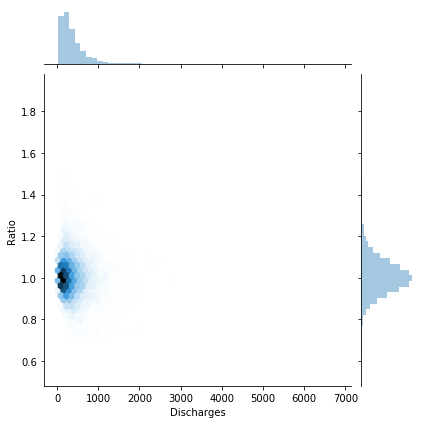

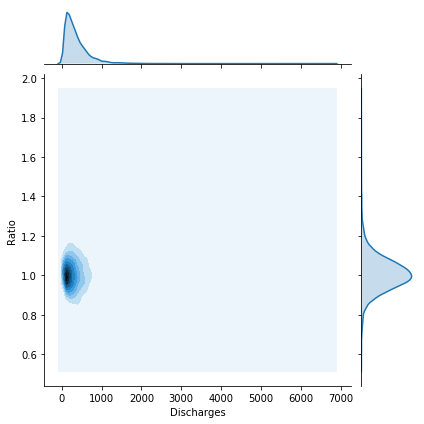

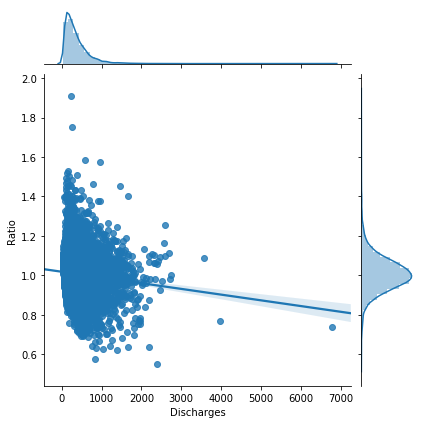

In [13]:
sns.jointplot('Discharges', 'Ratio', data=clean_data, kind='hex')
sns.jointplot('Discharges', 'Ratio', data=clean_data, kind='kde')
sns.jointplot('Discharges', 'Ratio', data=clean_data, kind='reg')